
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [3]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


[Text(0.47115384615384615, 0.9, 'thalach <= -0.213\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.25, 0.7, 'age <= 1.985\ngini = 0.455\nsamples = 105\nvalue = [75, 9, 17, 4]'),
 Text(0.3605769230769231, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'restecg <= -0.073\ngini = 0.438\nsamples = 103\nvalue = [75.0, 8.0, 16.0, 4.0]'),
 Text(0.07692307692307693, 0.3, 'chol <= -1.703\ngini = 0.334\nsamples = 52\nvalue = [42, 3, 5, 2]'),
 Text(0.038461538461538464, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.11538461538461539, 0.1, 'gini = 0.311\nsamples = 51\nvalue = [42, 3, 4, 2]'),
 Text(0.23076923076923078, 0.3, 'trtbps <= -1.647\ngini = 0.524\nsamples = 51\nvalue = [33, 5, 11, 2]'),
 Text(0.19230769230769232, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]'),
 Text(0.2692307692307692, 0.1, 'gini = 0.513\nsamples = 50\nvalue = [33, 5, 10, 2]'),
 Text(0.34615384615384615, 0.5, 'thalach <= -1.334\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]'),
 

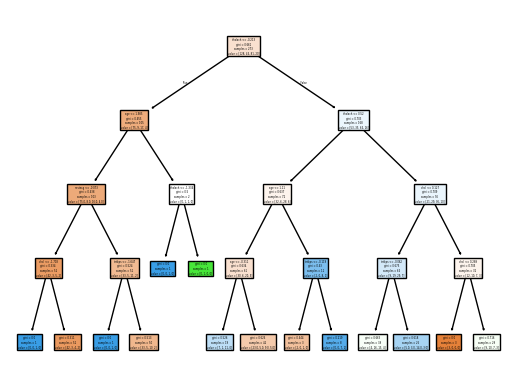

In [6]:
X = ha[["age", "sex", "trtbps", "chol", "restecg", "thalach"]]
y = ha["cp"]

knn_model = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])
knn_model.fit(X, y)

dt_model = Pipeline([
    ("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(random_state=42, max_depth=4))
])
dt_model.fit(X, y)

lda_model = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearDiscriminantAnalysis())
])
lda_model.fit(X, y)

plot_tree(dt_model.named_steps["model"], feature_names=["age", "sex", "trtbps", "chol", "restecg", "thalach"], filled=True)

The tree first splits on thalach where patients with thalach ≤ -0.213 go left while patients with thalach > -0.213 go right. In the second split, on the left branch age becomes the spliting factor and on the right branch thalach becomes the spliting factor.

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [13]:
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha[["cp", "cp_is_3"]]
y_cp3 = ha["cp_is_3"]
lr_cp3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_cp3.fit(X, y_cp3)

ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha[["cp", "cp_is_2"]]
y_cp2 = ha["cp_is_2"]
lr_cp2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_cp2.fit(X, y_cp2)

ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha[["cp", "cp_is_1"]]
y_cp1 = ha["cp_is_1"]
lr_cp1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_cp1.fit(X, y_cp1)

ha["cp_is_0"] = (ha["cp"] == 0) * 1
ha[["cp", "cp_is_0"]]
y_cp0 = ha["cp_is_0"]
lr_cp0 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_cp0.fit(X, y_cp0)

pd.DataFrame({
    "category": ["0", "1", "2", "3"],
    "f1_score": [
        cross_val_score(lr_cp0, X, y_cp0, cv=5, scoring="f1").mean(),
        cross_val_score(lr_cp1, X, y_cp1, cv=5, scoring="f1").mean(),
        cross_val_score(lr_cp2, X, y_cp2, cv=5, scoring="f1").mean(),
        cross_val_score(lr_cp3, X, y_cp3, cv=5, scoring="f1").mean()
    ]
})

,category,f1_score
0,0,0.588682
1,1,0.000000
2,2,0.085185
3,3,0.000000


0

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [14]:
ha_01 = ha[(ha["cp"] == 0) | (ha["cp"] == 1)]
X_01 = ha_01[["age", "sex", "trtbps", "chol", "restecg", "thalach"]]
y_01 = ha_01["cp"]
lr_01 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_01.fit(X_01, y_01)

ha_02 = ha[(ha["cp"] == 0) | (ha["cp"] == 2)]
X_02 = ha_02[["age", "sex", "trtbps", "chol", "restecg", "thalach"]]
y_02 = ha_02["cp"]
lr_02 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_02.fit(X_02, y_02)

ha_03 = ha[(ha["cp"] == 0) | (ha["cp"] == 3)]
X_03 = ha_03[["age", "sex", "trtbps", "chol", "restecg", "thalach"]]
y_03 = ha_03["cp"]
lr_03 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LogisticRegression())
])
lr_03.fit(X_03, y_03)

pd.DataFrame({
    "comparison": ["0 vs 1", "0 vs 2", "0 vs 3"],
    "roc_auc": [
        cross_val_score(lr_01, X_01, y_01, cv=5, scoring="roc_auc").mean(),
        cross_val_score(lr_02, X_02, y_02, cv=5, scoring="roc_auc").mean(),
        cross_val_score(lr_03, X_03, y_03, cv=5, scoring="roc_auc").mean()
    ]
})

,comparison,roc_auc
0,0 vs 1,0.757056
1,0 vs 2,0.656469
2,0 vs 3,0.704615


0 vs 1